In [2]:
import numpy as np
import spicy 
import matplotlib as plt
import os
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,confusion_matrix
from joblib import dump, load
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.inspection import permutation_importance
from joblib import load
from sklearn.compose import ColumnTransformer
from sklearn.utils import shuffle
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn import tree
from sklearn.preprocessing import RobustScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix     

In [6]:
dataset_name: str ="/data/notebook_files/acsincome_ca_features.csv"
dataset_path: str = os.path.join(dataset_name)
print(f"Dataset directory: {dataset_path}")
X_all : pd.DataFrame = pd.read_csv(dataset_path)
output_name = "/data/notebook_files/acsincome_ca_labels.csv"
output_path = os.path.join(output_name)
y_all : pd.DataFrame = pd.read_csv(output_path)


X_all, y_all = shuffle(X_all, y_all, random_state=1)
# only use the first N samples to limit training time
num_samples = int(len(X_all)*1)
X, y = X_all[:num_samples], y_all[:num_samples]



Dataset directory: /data/notebook_files/acsincome_ca_features.csv


In [7]:


numeric_feature = ["AGEP", "WKHP"]
categorical_features = ["COW", "SCHL", "MAR", "OCCP", "POBP", "RELP", "SEX", "RAC1P"]


preprocessor = ColumnTransformer(transformers=[('num', RobustScaler(), numeric_feature),
                                               ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
                                               ])



modelSVM = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])
modelSVM


Pipeline(steps=[('preprocessor',
 ColumnTransformer(transformers=[('num', RobustScaler(),
 ['AGEP', 'WKHP']),
 ('cat',
 OneHotEncoder(handle_unknown='ignore'),
 ['COW', 'SCHL', 'MAR', 'OCCP',
 'POBP', 'RELP', 'SEX',
 'RAC1P'])])),
 ('classifier', SVC())]) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. Pipeline Pipeline(steps=[('preprocessor',
 ColumnTransformer(transformers=[('num', RobustScaler(),
 ['AGEP', 'WKHP']),
 ('cat',
 OneHotEncoder(handle_unknown='ignore'),
 ['COW', 'SCHL', 'MAR', 'OCCP',
 'POBP', 'RELP', 'SEX',
 'RAC1P'])])),
 ('classifier', SVC())]) preprocessor: ColumnTransformer ColumnTransformer(transformers=[('num', RobustScaler(), ['AGEP', 'WKHP']),
 ('cat', OneHotEncoder(handle_unknown='ignore'),
 ['COW', 'SCHL', 'MAR', 'OCCP', 'POBP', 'RELP',
 'SEX', 'RAC1P'])]) num ['AGEP', 'WKHP'] RobustScaler RobustScaler() cat ['COW', 'SCHL', 'MAR', 'OCCP', 'POBP', 'RELP', 'SEX', 'RAC1P'] OneHotEncoder OneHotEncoder(handle_unknown='ignore') SVC SVC()

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score



param_grid_SVM = { 
    'classifier__C' : [0.01,0.1,1,10,100],
    'classifier__kernel' : ["linear", "poly", "rbf", "sigmoid"],
    'classifier__shrinking' : [True, False]
}

grid_SVM = GridSearchCV(modelSVM,param_grid_SVM,cv=5, verbose=2)
grid_SVM

GridSearchCV(cv=5,
 estimator=Pipeline(steps=[('preprocessor',
 ColumnTransformer(transformers=[('num',
 RobustScaler(),
 ['AGEP',
 'WKHP']),
 ('cat',
 OneHotEncoder(handle_unknown='ignore'),
 ['COW',
 'SCHL',
 'MAR',
 'OCCP',
 'POBP',
 'RELP',
 'SEX',
 'RAC1P'])])),
 ('classifier', SVC())]),
 param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
 'classifier__kernel': ['linear', 'poly', 'rbf',
 'sigmoid'],
 'classifier__shrinking': [True, False]},
 verbose=2) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. GridSearchCV GridSearchCV(cv=5,
 estimator=Pipeline(steps=[('preprocessor',
 ColumnTransformer(transformers=[('num',
 RobustScaler(),
 ['AGEP',
 'WKHP']),
 ('cat',
 OneHotEncoder(handle_unknown='ignore'),
 ['COW',
 'SCHL',
 'MAR',
 'OCCP',
 'POBP',
 'RELP',
 'SEX',
 'RAC1P'])])),
 ('classifier', SVC())]),
 param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
 'classifier__kernel': ['linear', 'poly', 'rbf',
 'sigmoid'],
 'classifier__shrinking': [True, False]},
 verbose=2) estimator: Pipeline Pipeline(steps=[('preprocessor',
 ColumnTransformer(transformers=[('num', RobustScaler(),
 ['AGEP', 'WKHP']),
 ('cat',
 OneHotEncoder(handle_unknown='ignore'),
 ['COW', 'SCHL', 'MAR', 'OCCP',
 'POBP', 'RELP', 'SEX',
 'RAC1P'])])),
 ('classifier', SVC())]) preprocessor: ColumnTransformer ColumnTransformer(transformers=[('num', RobustScaler(), ['AGEP', 'WKHP']),
 ('cat', OneHotEncoder(handle_unknown='ignore'),
 ['COW', 'SCHL', 'MAR', 'OCCP', 'POBP', 'RELP',
 'SEX', 'RAC1P'])]) num ['AGEP', 'WKHP'] RobustScaler RobustScaler() cat ['COW', 'SCHL', 'MAR', 'OCCP', 'POBP', 'RELP', 'SEX', 'RAC1P'] OneHotEncoder OneHotEncoder(handle_unknown='ignore') SVC SVC()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix       

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)




In [12]:
model_SVM = load('/data/notebook_files/model_SVM.joblib')
predict = model_SVM.predict(X_test)
accuracy_score_svc = accuracy_score(y_test["PINCP"], predict)
print("Accuracy test: ", accuracy_score_svc)
confusion_matrix_svc = confusion_matrix(y_test,predict)
print(confusion_matrix_svc)
print(classification_report(y_test["PINCP"], predict, labels=[0,1]))




Accuracy test:  0.7846678023850086
[[28347  6253]
 [ 6387 17713]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82     34600
           1       0.74      0.73      0.74     24100

    accuracy                           0.78     58700
   macro avg       0.78      0.78      0.78     58700
weighted avg       0.78      0.78      0.78     58700

              precision    recall  f1-score   support

       False       0.82      0.82      0.82     34600
        True       0.74      0.73      0.74     24100

    accuracy                           0.78     58700
   macro avg       0.78      0.78      0.78     58700
weighted avg       0.78      0.78      0.78     58700


In [69]:
dataset_name: str ="/data/notebook_files/acsincome_co_allfeaturesTP2.csv"
dataset_path: str = os.path.join(dataset_name)
print(f"Dataset directory: {dataset_path}")
X_all : pd.DataFrame = pd.read_csv(dataset_path)
output_name = "acsincome_co_labelTP2.csv"
output_path = os.path.join(output_name)
y_all : pd.DataFrame = pd.read_csv(output_path)


model_SVM = load('model_SVM.joblib')
predict = model_SVM.predict(X_all)
accuracy_score_svc_co = accuracy_score(y_all["PINCP"], predict)
print("Accuracy test on colorado: ", accuracy_score_svc_co)

Dataset directory: /data/notebook_files/acsincome_co_allfeaturesTP2.csv
Accuracy test on colorado:  0.7517089375838497


In [71]:
dataset_name: str ="/data/notebook_files/acsincome_ne_allfeaturesTP2.csv"
dataset_path: str = os.path.join(dataset_name)
print(f"Dataset directory: {dataset_path}")
X_all : pd.DataFrame = pd.read_csv(dataset_path)
output_name = "acsincome_ne_labelTP2.csv"
output_path = os.path.join(output_name)
y_all : pd.DataFrame = pd.read_csv(output_path)


model_SVM = load('/data/notebook_files/model_SVM.joblib')
predict = model_SVM.predict(X_all)
accuracy_score_svc_ne = accuracy_score(y_all["PINCP"], predict)
print("Accuracy test on nevada: ", accuracy_score_svc_ne)

Dataset directory: /data/notebook_files/acsincome_ne_allfeaturesTP2.csv
Accuracy test on nevada:  0.7399165507649513


In [6]:

from sklearn.ensemble import RandomForestClassifier

modelRF = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])
modelRF

Pipeline(steps=[('preprocessor',
 ColumnTransformer(transformers=[('num', RobustScaler(),
 ['AGEP', 'WKHP']),
 ('cat',
 OneHotEncoder(handle_unknown='ignore'),
 ['COW', 'SCHL', 'MAR', 'OCCP',
 'POBP', 'RELP', 'SEX',
 'RAC1P'])])),
 ('classifier', RandomForestClassifier())]) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. Pipeline Pipeline(steps=[('preprocessor',
 ColumnTransformer(transformers=[('num', RobustScaler(),
 ['AGEP', 'WKHP']),
 ('cat',
 OneHotEncoder(handle_unknown='ignore'),
 ['COW', 'SCHL', 'MAR', 'OCCP',
 'POBP', 'RELP', 'SEX',
 'RAC1P'])])),
 ('classifier', RandomForestClassifier())]) preprocessor: ColumnTransformer ColumnTransformer(transformers=[('num', RobustScaler(), ['AGEP', 'WKHP']),
 ('cat', OneHotEncoder(handle_unknown='ignore'),
 ['COW', 'SCHL', 'MAR', 'OCCP', 'POBP', 'RELP',
 'SEX', 'RAC1P'])]) num ['AGEP', 'WKHP'] RobustScaler RobustScaler() cat ['COW', 'SCHL', 'MAR', 'OCCP', 'POBP', 'RELP', 'SEX', 'RAC1P'] OneHotEncoder OneHotEncoder(handle_unknown='ignore') RandomForestClassifier RandomForestClassifier()

In [3]:
import numpy as np
param_grid_RF = { 
    'classifier__max_depth' : np.arange(1,1501,300),
    'classifier__criterion' : ["gini","entropy","log_loss"],
    'classifier__min_samples_leaf' : np.arange(1,16,2),
    'classifier__min_samples_split': np.arange(2,16,2)
}

grid_RF = GridSearchCV(modelRF,param_grid_RF,cv=5, verbose=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

grid_RF.fit(X_train, y_train["PINCP"])

predict = grid_RF.predict(X_test)
accuracy_score_rf = accuracy_score(y_test["PINCP"], predict)
print("Score training: ", grid_RF.best_score_)
print("Accuracy test: ", accuracy_score_rf)
print("Best parameters : ", grid_RF.best_params_)

best_model = grid_RF.best_estimator_
dump(best_model, '/data/notebook_files/model_RF.joblib')

NameError: NameError: name 'modelRF' is not defined

In [13]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model_RF = load("/data/notebook_files/model_RF.joblib")
predict = model_RF.predict(X_test)
accuracy_score_rf = accuracy_score(y_test["PINCP"], predict)
print("Accuracy test: ", accuracy_score_rf)
confusion_matrix_rf = confusion_matrix(y_test,predict)
print(confusion_matrix_rf)
print(classification_report(y_test["PINCP"], predict, labels=[0,1]))


Accuracy test:  0.7910391822827939
[[29803  4809]
 [ 7457 16631]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83     34612
           1       0.78      0.69      0.73     24088

    accuracy                           0.79     58700
   macro avg       0.79      0.78      0.78     58700
weighted avg       0.79      0.79      0.79     58700


In [73]:
dataset_name: str ="/data/notebook_files/acsincome_co_allfeaturesTP2.csv"
dataset_path: str = os.path.join(dataset_name)
print(f"Dataset directory: {dataset_path}")
X_all : pd.DataFrame = pd.read_csv(dataset_path)
output_name = "/data/notebook_files/acsincome_co_labelTP2.csv"
output_path = os.path.join(output_name)
y_all : pd.DataFrame = pd.read_csv(output_path)


model_RF = load('/data/notebook_files/model_RF.joblib')
predict = model_RF.predict(X_all)
accuracy_score_rf_co = accuracy_score(y_all["PINCP"], predict)
print("Accuracy test on colorado: ", accuracy_score_rf_co)

Dataset directory: /data/notebook_files/acsincome_co_allfeaturesTP2.csv
Accuracy test on colorado:  0.7633041589471666


In [17]:
dataset_name: str ="/data/notebook_files/acsincome_ne_allfeaturesTP2.csv"
dataset_path: str = os.path.join(dataset_name)
print(f"Dataset directory: {dataset_path}")
X_all : pd.DataFrame = pd.read_csv(dataset_path)
output_name = "/data/notebook_files/acsincome_ne_labelTP2.csv"
output_path = os.path.join(output_name)
y_all : pd.DataFrame = pd.read_csv(output_path)

print(classification_report(y_test["PINCP"], predict, labels=[0,1]))

model_RF = load('/data/notebook_files/model_RF.joblib')
predict = model_RF.predict(X_all)
accuracy_score_rf_ne = accuracy_score(y_all["PINCP"], predict)
print("Accuracy test on nevada: ", accuracy_score_rf_ne)

Dataset directory: /data/notebook_files/acsincome_ne_allfeaturesTP2.csv
              precision    recall  f1-score   support

           0       0.81      0.84      0.82     34612
           1       0.76      0.72      0.74     24088

    accuracy                           0.79     58700
   macro avg       0.78      0.78      0.78     58700
weighted avg       0.79      0.79      0.79     58700

Accuracy test on nevada:  0.7523412146499768


In [ ]:

from sklearn.ensemble import AdaBoostClassifier



modelADA = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier())
])

modelADA



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

param_grid_ADA = { 
    'classifier__n_estimators' : np.arange(1,91,30),
    'classifier__learning_rate' : np.arange(0,3, 1),
    'classifier__algorithm' : ['SAMME', 'SAMME.R'],
    'classifier__estimator' : [SVC(), RandomForestClassifier(), KNeighborsClassifier(), LogisticRegression() ]
}

grid_ADA = GridSearchCV(modelADA,param_grid_ADA,cv=5, verbose=2)


grid_ADA.fit(X_train, y_train["PINCP"])



best_model = grid_RF.best_estimator_
dump(best_model, '/data/notebook_files/model_ADA.joblib')

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

model_ADA = load("/data/notebook_files/model_ADA.joblib")
predict = model_ADA.predict(X_test)
accuracy_score_ada = accuracy_score(y_test["PINCP"], predict)
print("Accuracy test: ", accuracy_score_ada)
confusion_matrix_ada = confusion_matrix(y_test,predict)
print(confusion_matrix_ada)
print(classification_report(y_test["PINCP"], predict, labels=[0,1]))


Accuracy test:  0.778756388415673
[[29114  5498]
 [ 7489 16599]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82     34612
           1       0.75      0.69      0.72     24088

    accuracy                           0.78     58700
   macro avg       0.77      0.77      0.77     58700
weighted avg       0.78      0.78      0.78     58700


In [63]:
dataset_name: str ="/data/notebook_files/acsincome_co_allfeaturesTP2.csv"
dataset_path: str = os.path.join(dataset_name)
print(f"Dataset directory: {dataset_path}")
X_all : pd.DataFrame = pd.read_csv(dataset_path)
output_name = "/data/notebook_files/acsincome_co_labelTP2.csv"
output_path = os.path.join(output_name)
y_all : pd.DataFrame = pd.read_csv(output_path)


model_ADA = load('/data/notebook_files/model_ADA.joblib')
predict = model_ADA.predict(X_all)
accuracy_score_ada_co = accuracy_score(y_all["PINCP"], predict)
print("Accuracy test on colorado: ", accuracy_score_ada_co)

Dataset directory: /data/notebook_files/acsincome_co_allfeaturesTP2.csv
Accuracy test on colorado:  0.7534019037884112


In [77]:
dataset_name: str ="/data/notebook_files/acsincome_ne_allfeaturesTP2.csv"
dataset_path: str = os.path.join(dataset_name)
print(f"Dataset directory: {dataset_path}")
X_all : pd.DataFrame = pd.read_csv(dataset_path)
output_name = "/data/notebook_files/acsincome_ne_labelTP2.csv"
output_path = os.path.join(output_name)
y_all : pd.DataFrame = pd.read_csv(output_path)


model_ADA = load('/data/notebook_files/model_ADA.joblib')
predict = model_ADA.predict(X_all)
accuracy_score_ada_ne = accuracy_score(y_all["PINCP"], predict)
print("Accuracy test on nevada: ", accuracy_score_ada_ne)

Dataset directory: /data/notebook_files/acsincome_ne_allfeaturesTP2.csv
Accuracy test on nevada:  0.7387111729253593


In [36]:
from sklearn.ensemble import GradientBoostingClassifier



modelGBC = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier())
])

modelGBC

Pipeline(steps=[('preprocessor',
 ColumnTransformer(transformers=[('num', RobustScaler(),
 ['AGEP', 'WKHP']),
 ('cat',
 OneHotEncoder(handle_unknown='ignore'),
 ['COW', 'SCHL', 'MAR', 'OCCP',
 'POBP', 'RELP',
 'RAC1P'])])),
 ('classifier', GradientBoostingClassifier())]) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. Pipeline Pipeline(steps=[('preprocessor',
 ColumnTransformer(transformers=[('num', RobustScaler(),
 ['AGEP', 'WKHP']),
 ('cat',
 OneHotEncoder(handle_unknown='ignore'),
 ['COW', 'SCHL', 'MAR', 'OCCP',
 'POBP', 'RELP',
 'RAC1P'])])),
 ('classifier', GradientBoostingClassifier())]) preprocessor: ColumnTransformer ColumnTransformer(transformers=[('num', RobustScaler(), ['AGEP', 'WKHP']),
 ('cat', OneHotEncoder(handle_unknown='ignore'),
 ['COW', 'SCHL', 'MAR', 'OCCP', 'POBP', 'RELP',
 'RAC1P'])]) num ['AGEP', 'WKHP'] RobustScaler RobustScaler() cat ['COW', 'SCHL', 'MAR', 'OCCP', 'POBP', 'RELP', 'RAC1P'] OneHotEncoder OneHotEncoder(handle_unknown='ignore') GradientBoostingClassifier GradientBoostingClassifier()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


param_grid_GBC = { 
    'classifier__n_estimators' : np.arange(1,401,50),
    'classifier__learning_rate' : np.arange(0.0,2.0, 0.2),
    'classifier__min_samples_split' : np.arange(2,22, 5),
    'classifier__criterion' : ['friedman_mse', 'squared_error']
}

grid_GBC = GridSearchCV(modelGBC,param_grid_GBC,cv=5, verbose=2)


grid_GBC.fit(X_train, y_train["PINCP"])

predict = grid_GBC.predict(X_test)
accuracy_score_gbc = accuracy_score(y_test["PINCP"], predict)
print("Score training: ", grid_GBC.best_score_)
print("Accuracy test: ", accuracy_score_gbc)
print("Best parameters : ", grid_GBC.best_params_)

best_model = grid_GBC.best_estimator_
dump(best_model, 'model_GBC.joblib')

In [15]:
model_GBC = load("/data/notebook_files/model_GBC.joblib")
predict = model_GBC.predict(X_test)
accuracy_score_gbc = accuracy_score(y_test["PINCP"], predict)
print("Accuracy test: ", accuracy_score_gbc)
confusion_matrix_gbc = confusion_matrix(y_test,predict)
print(confusion_matrix_gbc)
print(classification_report(y_test["PINCP"], predict, labels=[0,1]))


Accuracy test:  0.7897955706984667
[[29030  5582]
 [ 6757 17331]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82     34612
           1       0.76      0.72      0.74     24088

    accuracy                           0.79     58700
   macro avg       0.78      0.78      0.78     58700
weighted avg       0.79      0.79      0.79     58700


In [78]:
dataset_name: str ="/data/notebook_files/acsincome_co_allfeaturesTP2.csv"
dataset_path: str = os.path.join(dataset_name)
print(f"Dataset directory: {dataset_path}")
X_all : pd.DataFrame = pd.read_csv(dataset_path)
output_name = "/data/notebook_files/acsincome_co_labelTP2.csv"
output_path = os.path.join(output_name)
y_all : pd.DataFrame = pd.read_csv(output_path)


model_GBC = load('/data/notebook_files/model_GBC.joblib')
predict = model_GBC.predict(X_all)
accuracy_score_gbc_co = accuracy_score(y_all["PINCP"], predict)
print("Accuracy test on colorado: ", accuracy_score_gbc_co)

Dataset directory: /data/notebook_files/acsincome_co_allfeaturesTP2.csv
Accuracy test on colorado:  0.6835430907813199


In [79]:
dataset_name: str ="/data/notebook_files/acsincome_ne_allfeaturesTP2.csv"
dataset_path: str = os.path.join(dataset_name)
print(f"Dataset directory: {dataset_path}")
X_all : pd.DataFrame = pd.read_csv(dataset_path)
output_name = "/data/notebook_files/acsincome_ne_labelTP2.csv"
output_path = os.path.join(output_name)
y_all : pd.DataFrame = pd.read_csv(output_path)


model_GBC = load('/data/notebook_files/model_GBC.joblib')
predict = model_GBC.predict(X_all)
accuracy_score_gbc_ne = accuracy_score(y_all["PINCP"], predict)
print("Accuracy test on nevada: ", accuracy_score_gbc_ne)

Dataset directory: /data/notebook_files/acsincome_ne_allfeaturesTP2.csv
Accuracy test on nevada:  0.7353732035234122


(1369, 1)


<Axes: >

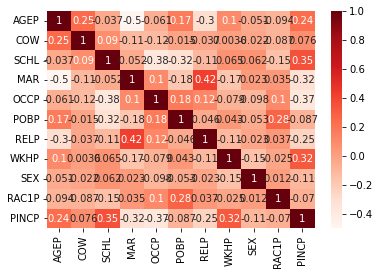

In [9]:
import seaborn as sns
merged_data = pd.concat([X_train, y_train], axis=1)
print(y_train.shape)
cor = merged_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

In [ ]:
#On observe que que les features que sont le plus corrélé avec le label sont celles le plus foncé dans la ligne PINCP, ou les plus claire. Ici, on observe  une corrélation au niveau de OCCP, SCHL et WKHP. 
#Ces features correspondent à l'occupation, leur graduation scolaire, et le nombre moyen d'heure de travail par semaine

<Axes: >

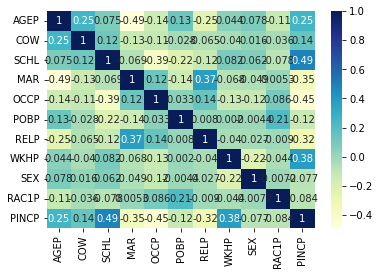

In [10]:
from joblib import load

model_SVM = load("/data/notebook_files/model_SVM.joblib")

testSVM = pd.DataFrame(X_test)
predictSVM = model_SVM.predict(X_test)
testSVM['PINCP'] = predictSVM
cor = testSVM.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.YlGnBu)

In [ ]:
#On observe une similarité pour les features importantes

<Axes: >

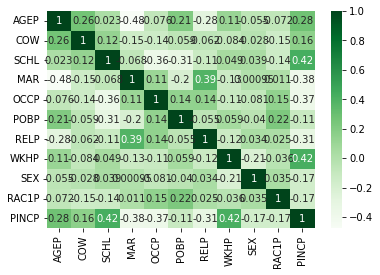

In [62]:
from joblib import load

model_ADA = load("/data/notebook_files/model_ADA.joblib")
testADA = pd.DataFrame(X_test)
predictAda = model_ADA.predict(X_test)
testADA['PINCP'] = predictAda
cor = testADA.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Greens)



In [ ]:
#Ici, on observe qye MAR a une grande importance, c'est celle correspondant au status marital.

<Axes: >

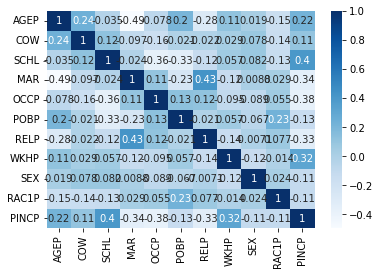

In [94]:

model_RF = load("/data/notebook_files/model_RF.joblib")

predictRf = model_RF.predict(X_test)
testRF = pd.DataFrame(X_test)
testRF['PINCP'] = predictRf
cor = pd.DataFrame(testRF).corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)

In [ ]:
#Comme celle initiale

<Axes: >

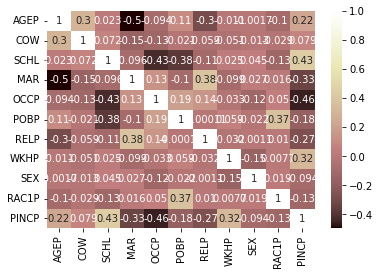

In [57]:

model_GBC = load("/data/notebook_files/model_GBC.joblib")

testGBC = pd.DataFrame(X_test)
predictGBC = model_GBC.predict(X_test)
pdPredictGBC = pd.DataFrame(predictGBC)
testGBC['PINCP'] = predictGBC
cor = testGBC.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.pink)

In [ ]:
#Comme celle initiale

In [63]:
from sklearn.inspection import permutation_importance

In [74]:
r = permutation_importance(model_ADA, X_test, y_test,n_repeats=30,random_state=0)
for i in r.importances_mean.argsort()[::-1]:
     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
         print(f"{X.columns[i]:<8}" f"{r.importances_mean[i]:.3f}" f" +/- {r.importances_std[i]:.3f}")

#Ici, on observe que la feature la plus importante vient de l'éducation, puis de taux de travail par semaine. On observe notamment que le sexe a un impact.

SCHL    0.074 +/- 0.013
WKHP    0.050 +/- 0.011
RELP    0.029 +/- 0.010
POBP    0.029 +/- 0.009
MAR     0.025 +/- 0.009
SEX     0.016 +/- 0.007


In [80]:
r = permutation_importance(model_GBC, X_test, y_test,n_repeats=30,random_state=0)
for i in r.importances_mean.argsort()[::-1]:
     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
         print(f"{X.columns[i]:<8}" f"{r.importances_mean[i]:.3f}" f" +/- {r.importances_std[i]:.3f}")
#Ici, le plus important semble être l'occupation, puis l'éducation.

OCCP    0.111 +/- 0.010
SCHL    0.089 +/- 0.010
WKHP    0.061 +/- 0.008
POBP    0.039 +/- 0.009
AGEP    0.027 +/- 0.008
RELP    0.024 +/- 0.005
COW     0.020 +/- 0.005
MAR     0.019 +/- 0.007


In [81]:
r = permutation_importance(model_RF, X_test, y_test,n_repeats=30,random_state=0)
for i in r.importances_mean.argsort()[::-1]:
     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
         print(f"{X.columns[i]:<8}" f"{r.importances_mean[i]:.3f}" f" +/- {r.importances_std[i]:.3f}")
#Education, occupation, sex et race sont aussi important

SCHL    0.104 +/- 0.009
OCCP    0.064 +/- 0.005
WKHP    0.064 +/- 0.008
MAR     0.059 +/- 0.009
RELP    0.055 +/- 0.007
POBP    0.038 +/- 0.007
AGEP    0.035 +/- 0.008
SEX     0.032 +/- 0.007
RAC1P   0.024 +/- 0.007
COW     0.016 +/- 0.005


In [82]:
r = permutation_importance(model_SVM, X_test, y_test,n_repeats=30,random_state=0)
for i in r.importances_mean.argsort()[::-1]:
     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
         print(f"{X.columns[i]:<8}" f"{r.importances_mean[i]:.3f}" f" +/- {r.importances_std[i]:.3f}")
#Education beaucoup, et Taux de travail.

SCHL    0.072 +/- 0.012
WKHP    0.034 +/- 0.009
OCCP    0.028 +/- 0.008
RELP    0.023 +/- 0.009
POBP    0.020 +/- 0.007


In [ ]:
#Equité :

In [26]:


model_SVM = load("/data/notebook_files/model_SVM.joblib")

def sex_confusion_matrix(model) :
    X_test_homme = X_test[X_test['SEX']==1]
    y_pred = model.predict(X_test_homme)

    y_test_homme = y_test[X_test['SEX']==1]

    conf_matrix_homme = confusion_matrix(y_test_homme, y_pred)

    print("Matrice de confusion homme : \n", conf_matrix_homme)

    X_test_femme = X_test[X_test['SEX']==2]
    y_pred = model.predict(X_test_femme)

    y_test_femme = y_test[X_test['SEX']==2]

    conf_matrix_femme = confusion_matrix(y_test_femme, y_pred)

    print("Matrice de confusion femme : \n", conf_matrix_femme)
    return conf_matrix_homme, conf_matrix_femme

In [59]:
model_SVM = load("/data/notebook_files/model_SVM.joblib")

sex_confusion_matrix(model_SVM)

Matrice de confusion homme : 
 [[146  32]
 [ 33 117]]
Matrice de confusion femme : 
 [[149  22]
 [ 22  66]]


In [60]:
model_ADA = load("/data/notebook_files/model_ADA.joblib")
sex_confusion_matrix(model_ADA)

Matrice de confusion homme : 
 [[149  29]
 [ 35 115]]
Matrice de confusion femme : 
 [[155  16]
 [ 32  56]]


In [61]:
model_RF = load("/data/notebook_files/model_RF.joblib")
sex_confusion_matrix(model_RF)

Matrice de confusion homme : 
 [[160  18]
 [ 19 131]]
Matrice de confusion femme : 
 [[160  11]
 [ 19  69]]


In [38]:
model_GBC = load('/data/notebook_files/model_GBC.joblib')
sex_confusion_matrix(model_GBC)

Matrice de confusion homme : 
 [[158  14]
 [ 18 127]]
Matrice de confusion femme : 
 [[166  11]
 [ 14  79]]


In [ ]:
#On observe que le biais de sex est plus important pour ADA,a plus de false postive, donc on croit que le salaire est bas alors que non. Pour les autres c'est moins marqué mais c'est quand meme le cas.

In [33]:

X_test['SEX'] = 1 

model_GBC = load('/data/notebook_files/model_GBC.joblib')
predict = model_GBC.predict(X_test)
accuracy_score_gbc_ne = accuracy_score(y_test["PINCP"], predict)
print("Accuracy test en disant que c'est des hommes: ", accuracy_score_gbc_ne)

X_test['SEX'] = 2
predict = model_GBC.predict(X_test)
accuracy_score_gbc_ne = accuracy_score(y_test["PINCP"], predict)
print("Accuracy test en disant que c'est des femmes: ", accuracy_score_gbc_ne)

#Accuracy avant : 0.89437
#Score tres legerement plus faible pour les femmes

Accuracy test en disant que c'est des hommes:  0.9045996592844975
Accuracy test en disant que c'est des femmes:  0.9011925042589438


In [42]:
X_test['SEX'] = 1 

model_SVM = load("/data/notebook_files/model_SVM.joblib")
predict = model_SVM.predict(X_test)
accuracy_score_hommes = accuracy_score(y_test["PINCP"], predict)
print("Accuracy test en disant que c'est des hommes: ", accuracy_score_hommes)

X_test['SEX'] = 2
predict = model_SVM.predict(X_test)
accuracy_score_femmes = accuracy_score(y_test["PINCP"], predict)
print("Accuracy test en disant que c'est des femmes: ", accuracy_score_femmes)

#Accuracy avant : 0.804088

Accuracy test en disant que c'est des hommes:  0.8126064735945485
Accuracy test en disant que c'est des femmes:  0.8245315161839863


In [43]:
X_test['SEX'] = 1 

model_ADA = load("/data/notebook_files/model_ADA.joblib")
predict = model_ADA.predict(X_test)
accuracy_score_hommes = accuracy_score(y_test["PINCP"], predict)
print("Accuracy test en disant que c'est des hommes: ", accuracy_score_hommes)

X_test['SEX'] = 2
predict = model_ADA.predict(X_test)
accuracy_score_femmes = accuracy_score(y_test["PINCP"], predict)
print("Accuracy test en disant que c'est des femmes: ", accuracy_score_femmes)

#0.79557069846 avant

Accuracy test en disant que c'est des hommes:  0.7904599659284497
Accuracy test en disant que c'est des femmes:  0.8040885860306644


In [44]:
X_test['SEX'] = 1 

model_RF = load("/data/notebook_files/model_RF.joblib")
predict = model_RF.predict(X_test)
accuracy_score_hommes = accuracy_score(y_test["PINCP"], predict)
print("Accuracy test en disant que c'est des hommes: ", accuracy_score_hommes)

X_test['SEX'] = 2
predict = model_RF.predict(X_test)
accuracy_score_femmes = accuracy_score(y_test["PINCP"], predict)
print("Accuracy test en disant que c'est des femmes: ", accuracy_score_femmes)

#Accuracy avant : 0.89097

Accuracy test en disant que c'est des hommes:  0.8722316865417377
Accuracy test en disant que c'est des femmes:  0.8705281090289608


In [ ]:
#Il faudra regarder a quel point on a perdu d accuracy en utilisant ces informations

In [14]:

model_RF = load("/data/notebook_files/model_RF.joblib")


def biais_race(model) :
    X_new = X_test
    for i in range(1,10) :
        print(i)
        X_test['RAC1P'] = i
        predict = model.predict(X_new)
        accuracy_score_race = accuracy_score(y_test["PINCP"], predict)
        print("Accuracy test : ", accuracy_score_race)


biais_race(model_RF)

1
Accuracy test :  0.8875638841567292
2
Accuracy test :  0.879045996592845
3
Accuracy test :  0.8909710391822828
4
Accuracy test :  0.8858603066439523
5
Accuracy test :  0.8858603066439523
6
Accuracy test :  0.8875638841567292
7
Accuracy test :  0.889267461669506
8
Accuracy test :  0.7904599659284497
9
Accuracy test :  0.8875638841567292


In [48]:
model_ADA = load("/data/notebook_files/model_ADA.joblib")
biais_race(model_ADA)

1
Accuracy test :  0.8143100511073254
2
Accuracy test :  0.8143100511073254
3
Accuracy test :  0.8109028960817717
4
Accuracy test :  0.8143100511073254
5
Accuracy test :  0.8143100511073254
6
Accuracy test :  0.8109028960817717
7
Accuracy test :  0.807495741056218
8
Accuracy test :  0.7938671209540034
9
Accuracy test :  0.8109028960817717


In [49]:

model_SVM = load("/data/notebook_files/model_SVM.joblib")
biais_race(model_SVM)

1
Accuracy test :  0.8347529812606473
2
Accuracy test :  0.8347529812606473
3
Accuracy test :  0.8347529812606473
4
Accuracy test :  0.8364565587734242
5
Accuracy test :  0.8364565587734242
6
Accuracy test :  0.82793867120954
7
Accuracy test :  0.838160136286201
8
Accuracy test :  0.8330494037478705
9
Accuracy test :  0.82793867120954


In [50]:
model_GBC = load('/data/notebook_files/model_GBC.joblib')
biais_race(model_GBC)

1
Accuracy test :  0.8943781942078365
2
Accuracy test :  0.9011925042589438
3
Accuracy test :  0.8977853492333902
4
Accuracy test :  0.8977853492333902
5
Accuracy test :  0.8977853492333902
6
Accuracy test :  0.8926746166950597
7
Accuracy test :  0.7734241908006815
8
Accuracy test :  0.9080068143100511
9
Accuracy test :  0.8841567291311755


In [45]:
def race_confusion_matrix(model) :
    X_test_hawai = X_test[X_test['RAC1P']==7]
    y_pred = model.predict(X_test_hawai)

    y_test_hawai = y_test[X_test['RAC1P']==7]

    conf_matrix_hawai = confusion_matrix(y_test_hawai, y_pred)

    print("Matrice de confusion hawai : \n", conf_matrix_hawai)

    X_test_twormore = X_test[X_test['RAC1P']==9]
    y_pred = model.predict(X_test_twormore)

    y_test_twormore = y_test[X_test['RAC1P']==9]

    conf_matrix_twormore = confusion_matrix(y_test_twormore, y_pred)

    print("Matrice de confusion other race alone : \n", conf_matrix_twormore)
    return conf_matrix_hawai, conf_matrix_twormore

model_GBC = load('/data/notebook_files/model_GBC.joblib')
mat = race_confusion_matrix(model_GBC)

Matrice de confusion hawai : 
 [[126   5]
 [ 41   8]]
Matrice de confusion other race alone : 
 [[1268  300]
 [ 196  664]]


In [ ]:
#Pour hawai on observe que l'on croit systématiquement que le salaire est bas. Alors que pour Two or More on est plutôt précis

In [6]:

model_SVM = load("/data/notebook_files/model_SVM.joblib")
race_confusion_matrix(model_SVM)

Matrice de confusion hawai : 
 [[4 0]
 [1 0]]
Matrice de confusion two or more : 
 [[16  1]
 [ 0  6]]


In [8]:
model_ADA = load("/data/notebook_files/model_ADA.joblib")
race_confusion_matrix(model_ADA)

Matrice de confusion hawai : 
 [[4 0]
 [1 0]]
Matrice de confusion two or more : 
 [[16  1]
 [ 0  6]]


In [10]:
model_RF = load("/data/notebook_files/model_RF.joblib")
race_confusion_matrix(model_RF)

Matrice de confusion hawai : 
 [[3 1]
 [1 0]]
Matrice de confusion two or more : 
 [[17  0]
 [ 0  6]]


In [11]:
#RF est le seul avec des résultats différents.

In [24]:
def statistical_parity(matrice1, matrice2) :
    print("Taux de prédiction négative pour hommes : ", (matrice1[0][0]+matrice1[1][0])/np.sum(matrice1))
    print("Taux de négatif détecté : ",matrice1[0][0]/np.sum(matrice1[0]))
    print("Taux de positive détecté : ",matrice1[1][1]/np.sum(matrice1[1]))
    print("Taux de prédiction négative pour femmes : ", (matrice2[0][0]+matrice2[1][0])/np.sum(matrice2))
    print("Taux de négatif détecté : ",matrice2[0][0]/np.sum(matrice2[0]))
    print("Taux de positive détecté : ",matrice2[1][1]/np.sum(matrice2[1]))

In [27]:
model_GBC = load('/data/notebook_files/model_GBC.joblib')
conf = sex_confusion_matrix(model_GBC)
statistical_parity(conf[0], conf[1])

Matrice de confusion homme : 
 [[13506  3078]
 [ 3738 10770]]
Matrice de confusion femme : 
 [[15347  2509]
 [ 3112  6640]]
Taux de prédiction négative pour hommes :  0.554612118873022
Taux de négatif détecté :  0.8143994211287988
Taux de positive détecté :  0.7423490488006617
Taux de prédiction négative pour femmes :  0.6686105476673428
Taux de négatif détecté :  0.8594870071684588
Taux de positive détecté :  0.6808859721082855


In [29]:
model_ADA = load('/data/notebook_files/model_ADA.joblib')
conf = sex_confusion_matrix(model_ADA)
statistical_parity(conf[0], conf[1])

Matrice de confusion homme : 
 [[13327  3257]
 [ 3672 10836]]
Matrice de confusion femme : 
 [[15656  2200]
 [ 3906  5846]]
Taux de prédiction négative pour hommes :  0.5467322783995883
Taux de négatif détecté :  0.8036058851905451
Taux de positive détecté :  0.7468982630272953
Taux de prédiction négative pour femmes :  0.7085627354390032
Taux de négatif détecté :  0.8767921146953405
Taux de positive détecté :  0.5994667760459393


In [30]:
model_RF = load('/data/notebook_files/model_RF.joblib')
conf = sex_confusion_matrix(model_RF)
statistical_parity(conf[0], conf[1])

Matrice de confusion homme : 
 [[13750  2834]
 [ 3838 10670]]
Matrice de confusion femme : 
 [[15899  1957]
 [ 3637  6115]]
Taux de prédiction négative pour hommes :  0.5656760581500064
Taux de négatif détecté :  0.8291123974915581
Taux de positive détecté :  0.735456299972429
Taux de prédiction négative pour femmes :  0.7076209794262532
Taux de négatif détecté :  0.8904009856630825
Taux de positive détecté :  0.6270508613617719


In [31]:
model_SVM = load('/data/notebook_files/model_SVM.joblib')
conf = sex_confusion_matrix(model_SVM)
statistical_parity(conf[0], conf[1])

Matrice de confusion homme : 
 [[13713  2871]
 [ 3957 10551]]
Matrice de confusion femme : 
 [[14439  3417]
 [ 2456  7296]]
Taux de prédiction négative pour hommes :  0.5683133925125434
Taux de négatif détecté :  0.8268813314037626
Taux de positive détecté :  0.727253928866832
Taux de prédiction négative pour femmes :  0.611960301361924
Taux de négatif détecté :  0.808635752688172
Taux de positive détecté :  0.7481542247744053


In [41]:
#On observe bien que notre modèle considère que les femmes auront un plus bas salaire.

In [44]:


def statistical_parity_race(matrice1, matrice2) :
    print("Taux de prédiction négative pour hawai : ", (matrice1[0][0]+matrice1[1][0])/np.sum(matrice1))
    print("Taux de négatif détecté : ",matrice1[0][0]/np.sum(matrice1[0]))
    print("Taux de positif détecté : ",matrice1[1][1]/np.sum(matrice1[1]))
    print("Taux de prédiction négative pour other race alone : ", (matrice2[0][0]+matrice2[1][0])/np.sum(matrice2))
    print("Taux de négatif détecté : ",matrice2[0][0]/np.sum(matrice2[0]))
    print("Taux de positif détecté : ",matrice2[1][1]/np.sum(matrice2[1]))

In [46]:
model_SVM = load('/data/notebook_files/model_SVM.joblib')
conf = race_confusion_matrix(model_SVM)
statistical_parity_race(conf[0], conf[1])

Matrice de confusion hawai : 
 [[110  21]
 [ 27  22]]
Matrice de confusion other race alone : 
 [[1222  346]
 [ 177  683]]
Taux de prédiction négative pour hawai :  0.7611111111111111
Taux de négatif détecté :  0.8396946564885496
Taux de positif détecté :  0.4489795918367347
Taux de prédiction négative pour other race alone :  0.5761943986820428
Taux de négatif détecté :  0.7793367346938775
Taux de positif détecté :  0.7941860465116279


In [48]:
model_ADA = load('/data/notebook_files/model_ADA.joblib')
conf = race_confusion_matrix(model_ADA)
statistical_parity_race(conf[0], conf[1])

Matrice de confusion hawai : 
 [[114  17]
 [ 29  20]]
Matrice de confusion other race alone : 
 [[1319  249]
 [ 262  598]]
Taux de prédiction négative pour hawai :  0.7944444444444444
Taux de négatif détecté :  0.8702290076335878
Taux de positif détecté :  0.40816326530612246
Taux de prédiction négative pour other race alone :  0.6511532125205931
Taux de négatif détecté :  0.8411989795918368
Taux de positif détecté :  0.6953488372093023


In [49]:
model_RF = load('/data/notebook_files/model_RF.joblib')
conf = race_confusion_matrix(model_RF)
statistical_parity_race(conf[0], conf[1])

Matrice de confusion hawai : 
 [[118  13]
 [ 29  20]]
Matrice de confusion other race alone : 
 [[1328  240]
 [ 255  605]]
Taux de prédiction négative pour hawai :  0.8166666666666667
Taux de négatif détecté :  0.9007633587786259
Taux de positif détecté :  0.40816326530612246
Taux de prédiction négative pour other race alone :  0.6519769357495881
Taux de négatif détecté :  0.8469387755102041
Taux de positif détecté :  0.7034883720930233


In [51]:
model_GBC = load('/data/notebook_files/model_GBC.joblib')
conf = race_confusion_matrix(model_GBC)
statistical_parity_race(conf[0], conf[1])

Matrice de confusion hawai : 
 [[126   5]
 [ 41   8]]
Matrice de confusion other race alone : 
 [[1268  300]
 [ 196  664]]
Taux de prédiction négative pour hawai :  0.9277777777777778
Taux de négatif détecté :  0.9618320610687023
Taux de positif détecté :  0.16326530612244897
Taux de prédiction négative pour other race alone :  0.6029654036243822
Taux de négatif détecté :  0.8086734693877551
Taux de positif détecté :  0.772093023255814


In [52]:
#On définit les même choses avec le train

def race_confusion_matrix_train(model) :
    X_train_hawai = X_train[X_train['RAC1P']==7]
    y_pred = model.predict(X_train_hawai)

    y_train_hawai = y_train[X_train['RAC1P']==7]

    conf_matrix_hawai = confusion_matrix(y_train_hawai, y_pred)

    print("Matrice de confusion hawai : \n", conf_matrix_hawai)

    X_train_twormore = X_train[X_train['RAC1P']==8]
    y_pred = model.predict(X_train_twormore)

    y_train_twormore = y_train[X_train['RAC1P']==8]

    conf_matrix_twormore = confusion_matrix(y_train_twormore, y_pred)

    print("Matrice de confusion other race alone : \n", conf_matrix_twormore)
    return conf_matrix_hawai, conf_matrix_twormore

def sexe_confusion_matrix_train(model) :
    X_train_homme = X_train[X_train['SEX']==1]
    y_pred = model.predict(X_train_homme)

    y_train_homme = y_train[X_train['SEX']==1]

    conf_matrix_homme = confusion_matrix(y_train_homme, y_pred)

    print("Matrice de confusion homme : \n", conf_matrix_homme)

    X_train_femme = X_train[X_train['SEX']==2]
    y_pred = model.predict(X_train_femme)

    y_train_femme = y_train[X_train['SEX']==2]

    conf_matrix_femme = confusion_matrix(y_train_femme, y_pred)

    print("Matrice de confusion femme : \n", conf_matrix_femme)
    return conf_matrix_homme, conf_matrix_femme

In [53]:
model_SVM = load('/data/notebook_files/model_SVM.joblib')
conf = race_confusion_matrix_train(model_SVM)
statistical_parity_race(conf[0], conf[1])
conf2 = sexe_confusion_matrix_train(model_SVM)
statistical_parity(conf2[0], conf2[1])

Matrice de confusion hawai : 
 [[271  45]
 [ 62  79]]
Matrice de confusion other race alone : 
 [[12156   680]
 [ 2023  1074]]
Taux de prédiction négative pour hawai :  0.7286652078774617
Taux de négatif détecté :  0.8575949367088608
Taux de positif détecté :  0.5602836879432624
Taux de prédiction négative pour other race alone :  0.889914014937551
Taux de négatif détecté :  0.947023995014023
Taux de positif détecté :  0.3467872134323539
Matrice de confusion homme : 
 [[31965  6665]
 [ 9187 24402]]
Matrice de confusion femme : 
 [[34219  8041]
 [ 5764 16722]]
Taux de prédiction négative pour hommes :  0.5698223459200488
Taux de négatif détecté :  0.8274657002329795
Taux de positive détecté :  0.7264878382803894
Taux de prédiction négative pour femmes :  0.6175362184536497
Taux de négatif détecté :  0.8097255087553242
Taux de positive détecté :  0.7436627234723828


In [56]:
#L'erreur est normal, on découvre que le modèle est biaisé simplement parce qu'il n'y a que des hawaiens positifs dans le modèle

In [36]:
conf2 = sexe_confusion_matrix_train(model_SVM)
statistical_parity(conf2[0], conf2[1])

Matrice de confusion homme : 
 [[31965  6665]
 [ 9187 24402]]
Matrice de confusion femme : 
 [[34219  8041]
 [ 5764 16722]]
Taux de prédiction négative pour hommes :  0.5698223459200488
Taux de négatif détecté :  0.8274657002329795
Taux de positive détecté :  0.7264878382803894
Taux de prédiction négative pour femmes :  0.6175362184536497
Taux de négatif détecté :  0.8097255087553242
Taux de positive détecté :  0.7436627234723828


In [37]:
model_ADA = load('/data/notebook_files/model_ADA.joblib')
conf = race_confusion_matrix_train(model_ADA)
statistical_parity_race(conf[0], conf[1])
conf2 = sexe_confusion_matrix_train(model_ADA)
statistical_parity(conf2[0], conf2[1])

Matrice de confusion hawai : 
 [[281  35]
 [ 75  66]]
Matrice de confusion other race alone : 
 [[12346   490]
 [ 2231   866]]
Taux de prédiction négative pour hawai :  0.7789934354485777
Taux de négatif détecté :  0.8892405063291139
Taux de positif détecté :  0.46808510638297873
Taux de prédiction négative pour other race alone :  0.9148936170212766
Taux de négatif détecté :  0.9618261140542225
Taux de positif détecté :  0.2796254439780433
Matrice de confusion homme : 
 [[31117  7513]
 [ 8582 25007]]
Matrice de confusion femme : 
 [[36963  5297]
 [ 8970 13516]]
Taux de prédiction négative pour hommes :  0.5497029867486396
Taux de négatif détecté :  0.8055138493398912
Taux de positive détecté :  0.7444996873976599
Taux de prédiction négative pour femmes :  0.7094337874154388
Taux de négatif détecté :  0.8746568859441552
Taux de positive détecté :  0.601085119629992


In [38]:
model_GBC = load('/data/notebook_files/model_GBC.joblib')
conf = race_confusion_matrix_train(model_GBC)
statistical_parity_race(conf[0], conf[1])
conf2 = sexe_confusion_matrix_train(model_GBC)
statistical_parity(conf2[0], conf2[1])

Matrice de confusion hawai : 
 [[306  10]
 [115  26]]
Matrice de confusion other race alone : 
 [[12099   737]
 [ 1909  1188]]
Taux de prédiction négative pour hawai :  0.9212253829321663
Taux de négatif détecté :  0.9683544303797469
Taux de positif détecté :  0.18439716312056736
Taux de prédiction négative pour other race alone :  0.8791815728362518
Taux de négatif détecté :  0.9425833593019632
Taux de positif détecté :  0.3835970293832741
Matrice de confusion homme : 
 [[31483  7147]
 [ 8728 24861]]
Matrice de confusion femme : 
 [[36385  5875]
 [ 7219 15267]]
Taux de prédiction négative pour hommes :  0.5567925338207397
Taux de négatif détecté :  0.8149883510225213
Taux de positive détecté :  0.7401530262883682
Taux de prédiction négative pour femmes :  0.673462453278967
Taux de négatif détecté :  0.8609796497870327
Taux de positive détecté :  0.6789557947167126


In [39]:
model_RF = load('/data/notebook_files/model_RF.joblib')
conf = race_confusion_matrix_train(model_RF)
statistical_parity_race(conf[0], conf[1])
conf2 = sexe_confusion_matrix_train(model_RF)
statistical_parity(conf2[0], conf2[1])

Matrice de confusion hawai : 
 [[285  31]
 [ 74  67]]
Matrice de confusion other race alone : 
 [[12634   202]
 [ 2530   567]]
Taux de prédiction négative pour hawai :  0.7855579868708972
Taux de négatif détecté :  0.9018987341772152
Taux de positif détecté :  0.475177304964539
Taux de prédiction négative pour other race alone :  0.9517353919538065
Taux de négatif détecté :  0.9842630102835774
Taux de positif détecté :  0.18308040038747175
Matrice de confusion homme : 
 [[32083  6547]
 [ 9046 24543]]
Matrice de confusion femme : 
 [[37706  4554]
 [ 8342 14144]]
Taux de prédiction négative pour hommes :  0.5695038701726692
Taux de négatif détecté :  0.830520320994046
Taux de positive détecté :  0.7306856411325137
Taux de prédiction négative pour femmes :  0.711209958916381
Taux de négatif détecté :  0.892238523426408
Taux de positive détecté :  0.6290136084674909


In [6]:
X_train_SEX = X_train.drop(['SEX'], axis=1)
X_test_SEX = X_test.drop(['SEX'], axis=1)

In [61]:
model_SVM = load('/data/notebook_files/model_SVM.joblib')

model_SVM.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('num', RobustScaler(), ['AGEP', 'WKHP']),
                                   ('cat', OneHotEncoder(handle_unknown='ignore'),
                                    ['COW', 'SCHL', 'MAR', 'OCCP', 'POBP', 'RELP',
                                     'RAC1P'])])),
  ('classifier', SVC(C=0.1, kernel='linear'))],
 'verbose': False,
 'preprocessor': ColumnTransformer(transformers=[('num', RobustScaler(), ['AGEP', 'WKHP']),
                                 ('cat', OneHotEncoder(handle_unknown='ignore'),
                                  ['COW', 'SCHL', 'MAR', 'OCCP', 'POBP', 'RELP',
                                   'RAC1P'])]),
 'classifier': SVC(C=0.1, kernel='linear'),
 'preprocessor__n_jobs': None,
 'preprocessor__remainder': 'drop',
 'preprocessor__sparse_threshold': 0.3,
 'preprocessor__transformer_weights': None,
 'preprocessor__transformers': [('num', RobustScaler(), ['AGEP', 'WKHP']),
  ('cat',
   OneHotEn

In [82]:

#Nouveau training sans SEX
from sklearn.compose import ColumnTransformer
numeric_feature = ["AGEP", "WKHP"]
categorical_features = ["COW", "SCHL", "MAR", "OCCP", "POBP", "RELP", "RAC1P"]


preprocessor = ColumnTransformer(transformers=[('num', RobustScaler(), numeric_feature),
                                               ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
                                               ])



modelSVM = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])
modelSVM

Pipeline(steps=[('preprocessor',
 ColumnTransformer(transformers=[('num', RobustScaler(),
 ['AGEP', 'WKHP']),
 ('cat',
 OneHotEncoder(handle_unknown='ignore'),
 ['COW', 'SCHL', 'MAR', 'OCCP',
 'POBP', 'RELP',
 'RAC1P'])])),
 ('classifier', SVC())]) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. Pipeline Pipeline(steps=[('preprocessor',
 ColumnTransformer(transformers=[('num', RobustScaler(),
 ['AGEP', 'WKHP']),
 ('cat',
 OneHotEncoder(handle_unknown='ignore'),
 ['COW', 'SCHL', 'MAR', 'OCCP',
 'POBP', 'RELP',
 'RAC1P'])])),
 ('classifier', SVC())]) preprocessor: ColumnTransformer ColumnTransformer(transformers=[('num', RobustScaler(), ['AGEP', 'WKHP']),
 ('cat', OneHotEncoder(handle_unknown='ignore'),
 ['COW', 'SCHL', 'MAR', 'OCCP', 'POBP', 'RELP',
 'RAC1P'])]) num ['AGEP', 'WKHP'] RobustScaler RobustScaler() cat ['COW', 'SCHL', 'MAR', 'OCCP', 'POBP', 'RELP', 'RAC1P'] OneHotEncoder OneHotEncoder(handle_unknown='ignore') SVC SVC()

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score



param_grid_SVM = { 
    'classifier__C' : [0.1],
    'classifier__kernel' : ["linear"],
    'classifier__shrinking' : [True]
}

grid_SVM = GridSearchCV(modelSVM,param_grid_SVM,cv=5, verbose=2)

NameError: NameError: name 'modelSVM' is not defined

In [66]:
X_train_SEX = X_train.drop(['SEX'], axis=1)
X_test_SEX = X_test.drop(['SEX'], axis=1)
grid_SVM.fit(X_train, y_train["PINCP"])
best_model = grid_SVM.best_estimator_
dump(best_model, '/data/notebook_files/model_SVM_SEX.joblib')

NameError: NameError: name 'grid_SVM' is not defined

In [7]:
model_SVM_SEX = load('/data/notebook_files/model_SVM_SEX.joblib')
predict = model_SVM_SEX.predict(X_test_SEX)
accuracy_score(y_test["PINCP"], predict)
#Accuracy avant : 0.804088

0.8194207836456558

In [66]:
model_GBC = load('/data/notebook_files/model_GBC.joblib')

model_GBC.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('num', RobustScaler(), ['AGEP', 'WKHP']),
                                   ('cat', OneHotEncoder(handle_unknown='ignore'),
                                    ['COW', 'SCHL', 'MAR', 'OCCP', 'POBP', 'RELP',
                                     'SEX', 'RAC1P'])])),
  ('classifier',
   GradientBoostingClassifier(learning_rate=0.2, min_samples_split=12,
                              n_estimators=351))],
 'verbose': False,
 'preprocessor': ColumnTransformer(transformers=[('num', RobustScaler(), ['AGEP', 'WKHP']),
                                 ('cat', OneHotEncoder(handle_unknown='ignore'),
                                  ['COW', 'SCHL', 'MAR', 'OCCP', 'POBP', 'RELP',
                                   'SEX', 'RAC1P'])]),
 'classifier': GradientBoostingClassifier(learning_rate=0.2, min_samples_split=12,
                            n_estimators=351),
 'preprocessor__n_jobs': None,
 'preprocessor__remainder

In [19]:

modelGBC = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier())
])


param_grid_GBC = { 
    'classifier__n_estimators' : [351],
    'classifier__learning_rate' : [0.2],
    'classifier__min_samples_split' : [12],
    'classifier__criterion' : ['friedman_mse']
}

grid_GBC = GridSearchCV(modelGBC,param_grid_GBC,cv=5, verbose=2)


grid_GBC.fit(X_train_SEX, y_train["PINCP"])

predict = grid_GBC.predict(X_test_SEX)
accuracy_score_gbc = accuracy_score(y_test["PINCP"], predict)
print("Score training: ", grid_GBC.best_score_)
print("Accuracy test: ", accuracy_score_gbc)

best_model = grid_GBC.best_estimator_
dump(best_model, 'model_GBC_SEX.joblib')

#Acuracy avant 0.89437

NameError: NameError: name 'GradientBoostingClassifier' is not defined

In [67]:
model_GBC = load('/data/notebook_files/model_GBC_SEX.joblib')
X_test_SEX = X_test.drop(['SEX'], axis=1)
conf2 = sexe_confusion_matrix_train(model_GBC)
statistical_parity(conf2[0], conf2[1])

predict = model_GBC.predict(X_test_SEX)
accuracy_score_gbc = accuracy_score(y_test["PINCP"], predict)
print("Accuracy test: ", accuracy_score_gbc)

Matrice de confusion homme : 
 [[31952  6620]
 [ 9388 24435]]
Matrice de confusion femme : 
 [[35033  6903]
 [ 6251 16383]]
Taux de prédiction négative pour hommes :  0.5710339111817114
Taux de négatif détecté :  0.8283729129938816
Taux de positive détecté :  0.7224373946722644
Taux de prédiction négative pour femmes :  0.6393681276134427
Taux de négatif détecté :  0.8353920259442961
Taux de positive détecté :  0.7238225678183264
Accuracy test:  0.7841396933560477


In [69]:
model_GBC = load('/data/notebook_files/model_GBC.joblib')


predict = model_GBC.predict(X_test)
accuracy_score_gbc = accuracy_score(y_test["PINCP"], predict)
print("Accuracy test: ", accuracy_score_gbc)

Accuracy test:  0.7872572402044293


In [83]:
from sklearn.ensemble import RandomForestClassifier

X_train_RACE = X_train.drop(['SEX'], axis=1)
X_test_RACE = X_test.drop(['SEX'], axis=1)
modelRF = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])


param_grid_RF = { 
    'classifier__max_depth' : [100],
    'classifier__criterion' : ['entropy'],
    'classifier__min_samples_leaf' : [1],
    'classifier__min_samples_split': [12]
}

grid_RF = GridSearchCV(modelRF,param_grid_RF,cv=5, verbose=2)


grid_RF.fit(X_train_RACE, y_train["PINCP"])

predict = grid_RF.predict(X_test_RACE)
accuracy_score_RF = accuracy_score(y_test["PINCP"], predict)
print("Score training: ", grid_RF.best_score_)
print("Accuracy test: ", accuracy_score_RF)

best_model = grid_RF.best_estimator_
dump(best_model, 'model_RF_SEX.joblib')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END classifier__criterion=entropy, classifier__max_depth=100, classifier__min_samples_leaf=1, classifier__min_samples_split=12; total time=   1.2s
[CV] END classifier__criterion=entropy, classifier__max_depth=100, classifier__min_samples_leaf=1, classifier__min_samples_split=12; total time=   1.2s
[CV] END classifier__criterion=entropy, classifier__max_depth=100, classifier__min_samples_leaf=1, classifier__min_samples_split=12; total time=   1.2s
[CV] END classifier__criterion=entropy, classifier__max_depth=100, classifier__min_samples_leaf=1, classifier__min_samples_split=12; total time=   1.2s
[CV] END classifier__criterion=entropy, classifier__max_depth=100, classifier__min_samples_leaf=1, classifier__min_samples_split=12; total time=   1.2s
Score training:  0.7982831716828317
Accuracy test:  0.8100511073253833


['model_RF_SEX.joblib']

In [87]:
model_RF = load('/data/notebook_files/model_RF_SEX.joblib')
X_test_SEX = X_test.drop(['SEX'], axis=1)
conf2 = sexe_confusion_matrix_train(model_RF)
statistical_parity(conf2[0], conf2[1])

predict = model_RF.predict(X_test_SEX)
accuracy_score_rf = accuracy_score(y_test["PINCP"], predict)
print("Accuracy test: ", accuracy_score_rf)

Matrice de confusion homme : 
 [[33529  5153]
 [ 9580 24025]]
Matrice de confusion femme : 
 [[36415  5658]
 [ 6465 16140]]
Taux de prédiction négative pour hommes :  0.5963589580422483
Taux de négatif détecté :  0.8667855850266274
Taux de positive détecté :  0.7149233744978426
Taux de prédiction négative pour femmes :  0.662976591731346
Taux de négatif détecté :  0.8655194542818435
Taux de positive détecté :  0.7140013271400133
Accuracy test:  0.8050596252129472


In [73]:
#On dirait que c'est pas un biais du modèle du coup ? 
model_RF = load('/data/notebook_files/model_RF.joblib')

model_RF.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('num', RobustScaler(), ['AGEP', 'WKHP']),
                                   ('cat', OneHotEncoder(handle_unknown='ignore'),
                                    ['COW', 'SCHL', 'MAR', 'OCCP', 'POBP', 'RELP',
                                     'SEX', 'RAC1P'])])),
  ('classifier',
   RandomForestClassifier(criterion='entropy', max_depth=901, min_samples_split=12))],
 'verbose': False,
 'preprocessor': ColumnTransformer(transformers=[('num', RobustScaler(), ['AGEP', 'WKHP']),
                                 ('cat', OneHotEncoder(handle_unknown='ignore'),
                                  ['COW', 'SCHL', 'MAR', 'OCCP', 'POBP', 'RELP',
                                   'SEX', 'RAC1P'])]),
 'classifier': RandomForestClassifier(criterion='entropy', max_depth=901, min_samples_split=12),
 'preprocessor__n_jobs': None,
 'preprocessor__remainder': 'drop',
 'preprocessor__sparse_threshold': 0.3,
 'preprocessor__t

In [72]:
numeric_feature = ["AGEP", "WKHP"]
categorical_features = ["COW", "SCHL", "MAR", "OCCP", "POBP","SEX", "RELP"]


preprocessor = ColumnTransformer(transformers=[('num', RobustScaler(), numeric_feature),
                                               ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
                                               ])

In [74]:
X_train_RACE = X_train.drop(['RAC1P'], axis=1)
X_test_RACE = X_test.drop(['RAC1P'], axis=1)
modelGBC = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier())
])


param_grid_GBC = { 
    'classifier__n_estimators' : [351],
    'classifier__learning_rate' : [0.2],
    'classifier__min_samples_split' : [12],
    'classifier__criterion' : ['friedman_mse']
}

grid_GBC = GridSearchCV(modelGBC,param_grid_GBC,cv=5, verbose=2)


grid_GBC.fit(X_train_RACE, y_train["PINCP"])

predict = grid_GBC.predict(X_test_RACE)
accuracy_score_gbc = accuracy_score(y_test["PINCP"], predict)
print("Score training: ", grid_GBC.best_score_)
print("Accuracy test: ", accuracy_score_gbc)

best_model = grid_GBC.best_estimator_
dump(best_model, 'model_GBC_RACE.joblib')

NameError: NameError: name 'GradientBoostingClassifier' is not defined

In [59]:
model_GBC = load('/data/notebook_files/model_GBC_RACE.joblib')
conf = race_confusion_matrix(model_GBC)
statistical_parity_race(conf[0], conf[1])
X_train_RACE = X_train.drop(['RAC1P'], axis=1)
X_test_RACE = X_test.drop(['RAC1P'], axis=1)
predict = model_GBC.predict(X_test_RACE)
accuracy_score_gbc = accuracy_score(y_test["PINCP"], predict)
print("Accuracy test: ", accuracy_score_gbc)

Matrice de confusion hawai : 
 [[128  16]
 [ 17  35]]
Matrice de confusion other race alone : 
 [[1336  242]
 [ 274  640]]
Taux de prédiction négative pour hawai :  0.7397959183673469
Taux de négatif détecté :  0.8888888888888888
Taux de positif détecté :  0.6730769230769231
Taux de prédiction négative pour other race alone :  0.6460674157303371
Taux de négatif détecté :  0.8466413181242078
Taux de positif détecté :  0.700218818380744
Accuracy test:  0.7878023850085178


In [73]:
#Voilà on remarque des différences

In [79]:
from sklearn.ensemble import RandomForestClassifier

X_train_RACE = X_train.drop(['RAC1P'], axis=1)
X_test_RACE = X_test.drop(['RAC1P'], axis=1)
modelRF = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])


param_grid_RF = { 
    'classifier__max_depth' : [100],
    'classifier__criterion' : ['entropy'],
    'classifier__min_samples_leaf' : [1],
    'classifier__min_samples_split': [12]
}

grid_RF = GridSearchCV(modelRF,param_grid_RF,cv=5, verbose=2)


grid_RF.fit(X_train_RACE, y_train["PINCP"])

predict = grid_RF.predict(X_test_RACE)
accuracy_score_RF = accuracy_score(y_test["PINCP"], predict)
print("Score training: ", grid_RF.best_score_)
print("Accuracy test: ", accuracy_score_RF)

best_model = grid_RF.best_estimator_
dump(best_model, 'model_RF_RACE.joblib')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END classifier__criterion=entropy, classifier__max_depth=100, classifier__min_samples_leaf=1, classifier__min_samples_split=12; total time=   1.2s
[CV] END classifier__criterion=entropy, classifier__max_depth=100, classifier__min_samples_leaf=1, classifier__min_samples_split=12; total time=   1.2s
[CV] END classifier__criterion=entropy, classifier__max_depth=100, classifier__min_samples_leaf=1, classifier__min_samples_split=12; total time=   1.2s
[CV] END classifier__criterion=entropy, classifier__max_depth=100, classifier__min_samples_leaf=1, classifier__min_samples_split=12; total time=   1.2s
[CV] END classifier__criterion=entropy, classifier__max_depth=100, classifier__min_samples_leaf=1, classifier__min_samples_split=12; total time=   1.2s
Score training:  0.7977367263273673
Accuracy test:  0.8160136286201022


['model_RF_RACE.joblib']

In [88]:
model_RF= load('/data/notebook_files/model_RF_RACE.joblib')
conf = race_confusion_matrix(model_RF)
statistical_parity_race(conf[0], conf[1])
X_train_RACE = X_train.drop(['RAC1P'], axis=1)
X_test_RACE = X_test.drop(['RAC1P'], axis=1)
predict = model_RF.predict(X_test_RACE)
accuracy_score_rf = accuracy_score(y_test["PINCP"], predict)
print("Accuracy test: ", accuracy_score_rf)

Matrice de confusion hawai : 
 [[106  20]
 [ 22  32]]
Matrice de confusion other race alone : 
 [[1471  169]
 [ 277  619]]
Taux de prédiction négative pour hawai :  0.7111111111111111
Taux de négatif détecté :  0.8412698412698413
Taux de positif détecté :  0.5925925925925926
Taux de prédiction négative pour other race alone :  0.6892744479495269
Taux de négatif détecté :  0.8969512195121951
Taux de positif détecté :  0.6908482142857143
Accuracy test:  0.8068143100511074


In [86]:
percentage_sex_1 = (X_test['SEX'].eq(1).sum() / len(X_test['SEX'])) * 100

print(f"Pourcentage de SEX=1 dans X_test : {percentage_sex_1:.2f}%")

Pourcentage de SEX=1 dans X_test : 54.34%


In [56]:
for i in range(1, 10):
    percentage_race = (X['RAC1P'].eq(i).sum() / len(X['RAC1P'])) * 100
    print(f"Pourcentage de RAC1P={i} dans X_test : {percentage_race:.2f}%")

Pourcentage de RAC1P=1 dans X_test : 61.84%
Pourcentage de RAC1P=2 dans X_test : 4.37%
Pourcentage de RAC1P=3 dans X_test : 0.66%
Pourcentage de RAC1P=4 dans X_test : 0.01%
Pourcentage de RAC1P=5 dans X_test : 0.23%
Pourcentage de RAC1P=6 dans X_test : 16.72%
Pourcentage de RAC1P=7 dans X_test : 0.33%
Pourcentage de RAC1P=8 dans X_test : 11.65%
Pourcentage de RAC1P=9 dans X_test : 4.19%
